# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.ensemble import IsolationForest
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import SelectKBest, f_classif
from scipy import stats

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# MEMUAT DATASET
df = pd.read_csv('https://raw.githubusercontent.com/silviaazahro/Projek_Machine_Learning_Pemula/refs/heads/main/dataset_clustering.csv')
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (2512, 16)


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Menampilkan informasi tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [4]:
# Konversi Kolom Tanggal ke Format Datetime jika Ada
if 'TransactionDate' in df.columns:
    df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')
    df = df.dropna(subset=['TransactionDate'])  # Menghapus baris yang gagal dikonversi
    df['TransactionHour'] = df['TransactionDate'].dt.hour  # Ekstraksi jam transaksi

In [5]:
# Mengecek missing values
display(df.isnull().sum())

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [6]:
# Statistik deskriptif untuk variabel numerik
df.describe()

,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour
count,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,2023-07-05 20:32:10.826433024,44.673965,119.643312,1.124602,5114.302966,16.626194
min,0.260000,2023-01-02 16:00:06,18.000000,10.000000,1.000000,101.250000,16.000000
25%,81.885000,2023-04-03 16:22:05.750000128,27.000000,63.000000,1.000000,1504.370000,16.000000
50%,211.140000,2023-07-07 17:49:43.500000,45.000000,112.500000,1.000000,4735.510000,16.000000
75%,414.527500,2023-10-06 18:40:53.500000,59.000000,161.000000,1.000000,7678.820000,17.000000
max,1919.110000,2024-01-01 18:21:50,80.000000,300.000000,5.000000,14977.990000,18.000000
std,291.946243,NaN,17.792198,69.963757,0.602662,3900.942499,0.731059


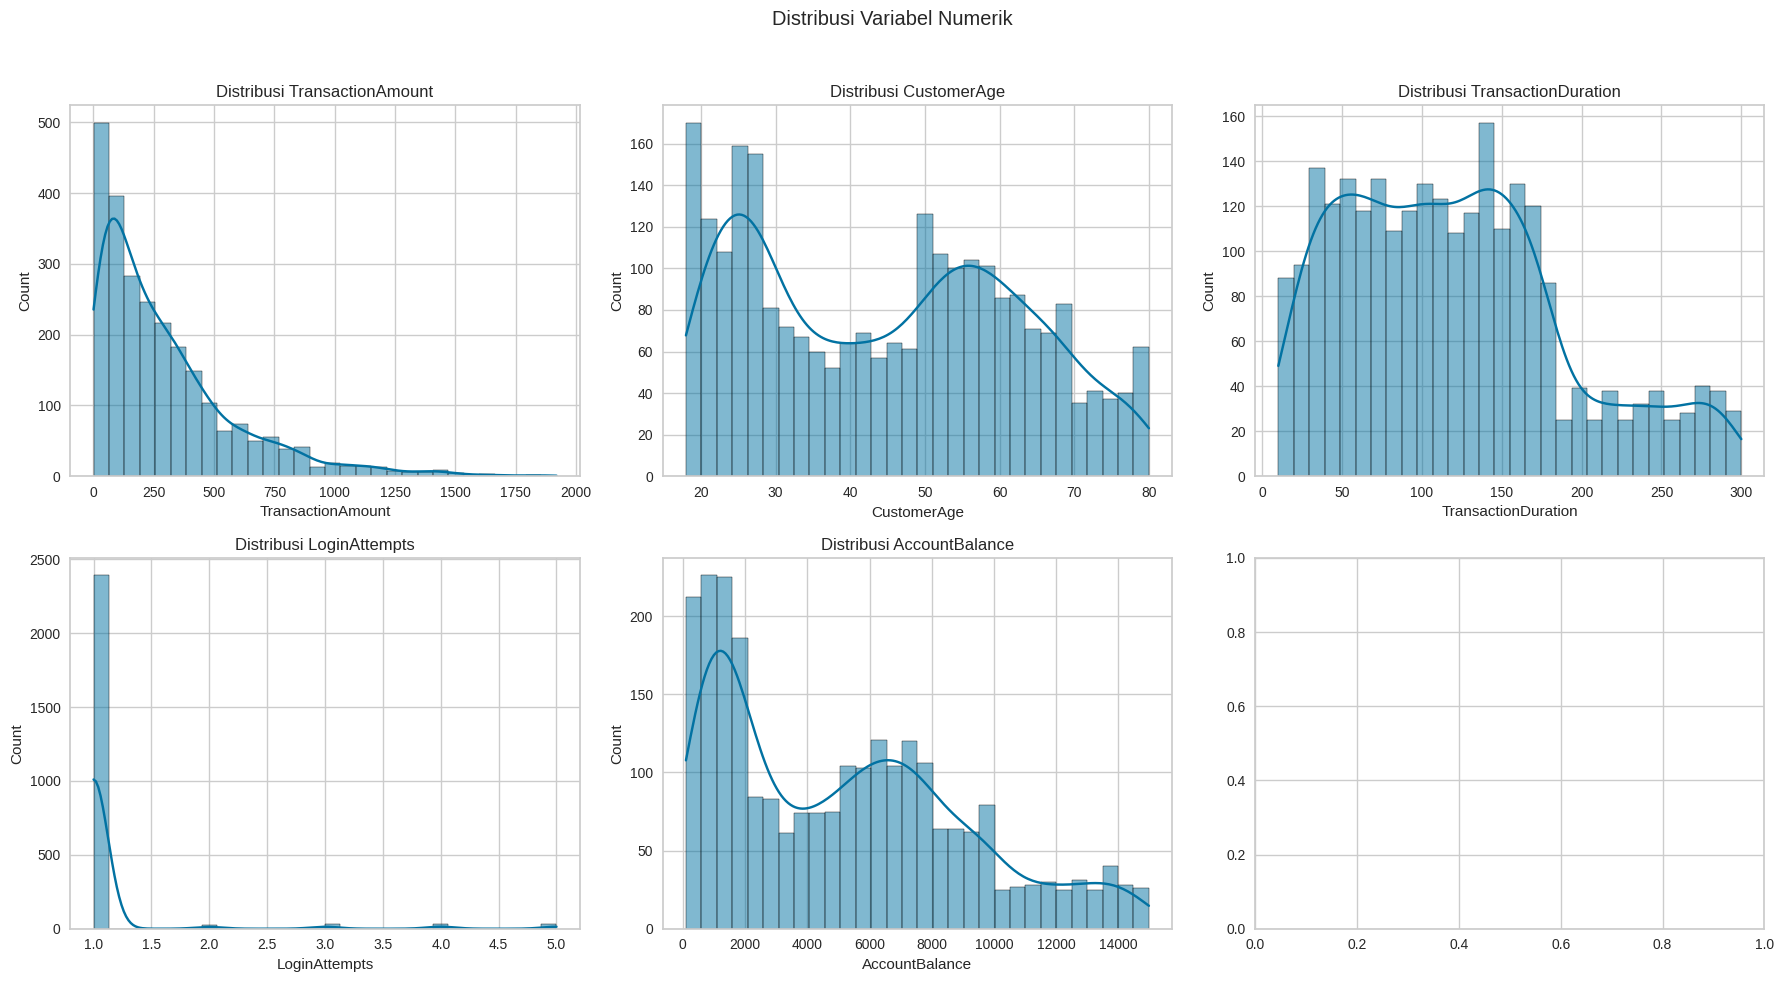

In [7]:
# Visualisasi distribusi variabel numerik
numeric_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("Distribusi Variabel Numerik")

for i, col in enumerate(numeric_cols):
    ax = axes[i // 3, i % 3]
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribusi {col}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<ipython-input-8-3e5521814d72>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="TransactionType", data=df, ax=axes[0], palette="Set2")
<ipython-input-8-3e5521814d72>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Channel", data=df, ax=axes[1], palette="Set2")


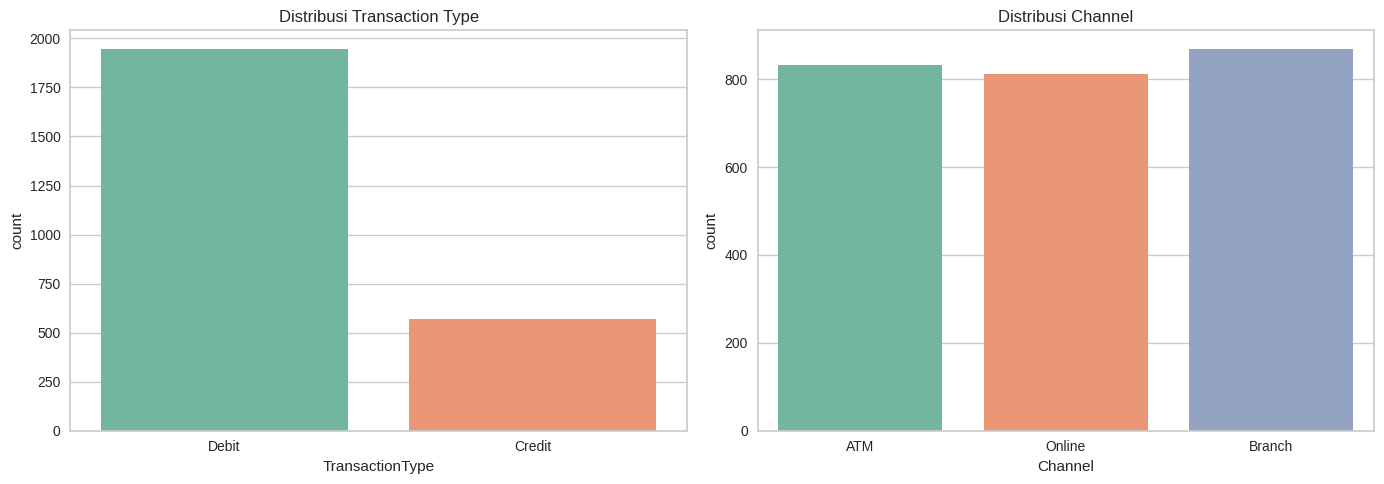

In [8]:
# Visualisasi variabel kategorikal (TransactionType & Channel)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x="TransactionType", data=df, ax=axes[0], palette="Set2")
axes[0].set_title("Distribusi Transaction Type")

sns.countplot(x="Channel", data=df, ax=axes[1], palette="Set2")
axes[1].set_title("Distribusi Channel")

plt.tight_layout()
plt.show()

<ipython-input-9-5c445ff200b0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Location', data=df, order=top_20_locations, palette='coolwarm')


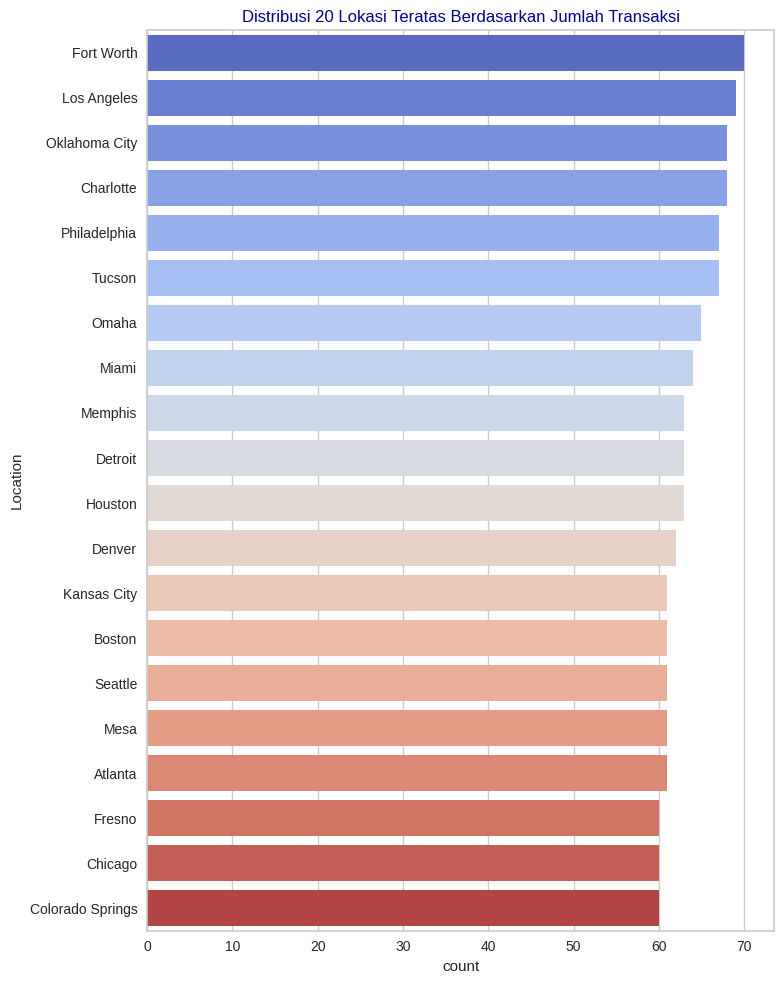

In [9]:
# Menentukan 20 lokasi dengan transaksi terbanyak
top_20_locations = df['Location'].value_counts().index[:20]
plt.figure(figsize=(8, 10))

# Menggunakan countplot untuk menggantikan custom_countplot
sns.countplot(y='Location', data=df, order=top_20_locations, palette='coolwarm')
plt.title('Distribusi 20 Lokasi Teratas Berdasarkan Jumlah Transaksi', color="darkblue")
plt.tight_layout()
plt.show()

<ipython-input-10-20aa24469678>:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  sns.countplot(x='Location', hue='TransactionType', data=df, color='green')


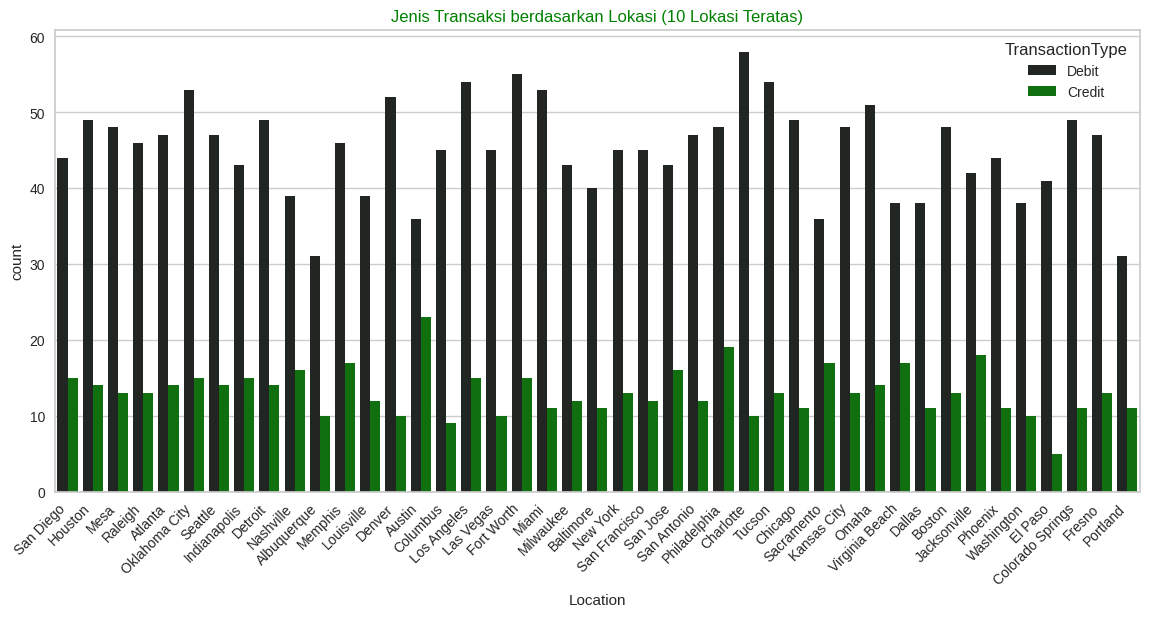

In [10]:
# Jenis Transaksi berdasarkan Lokasi (10 Lokasi Teratas)
plt.figure(figsize=(14, 6))
top_10_locations = df['Location'].value_counts().index[:10]
df_filtered = df[df['Location'].isin(top_10_locations)]
sns.countplot(x='Location', hue='TransactionType', data=df, color='green')
plt.xticks(rotation=45, ha="right")
plt.title('Jenis Transaksi berdasarkan Lokasi (10 Lokasi Teratas)', color="green")
plt.show()

<ipython-input-11-aeb0bc977f61>:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.countplot(x='Location', hue='Channel', data=df, color='red')


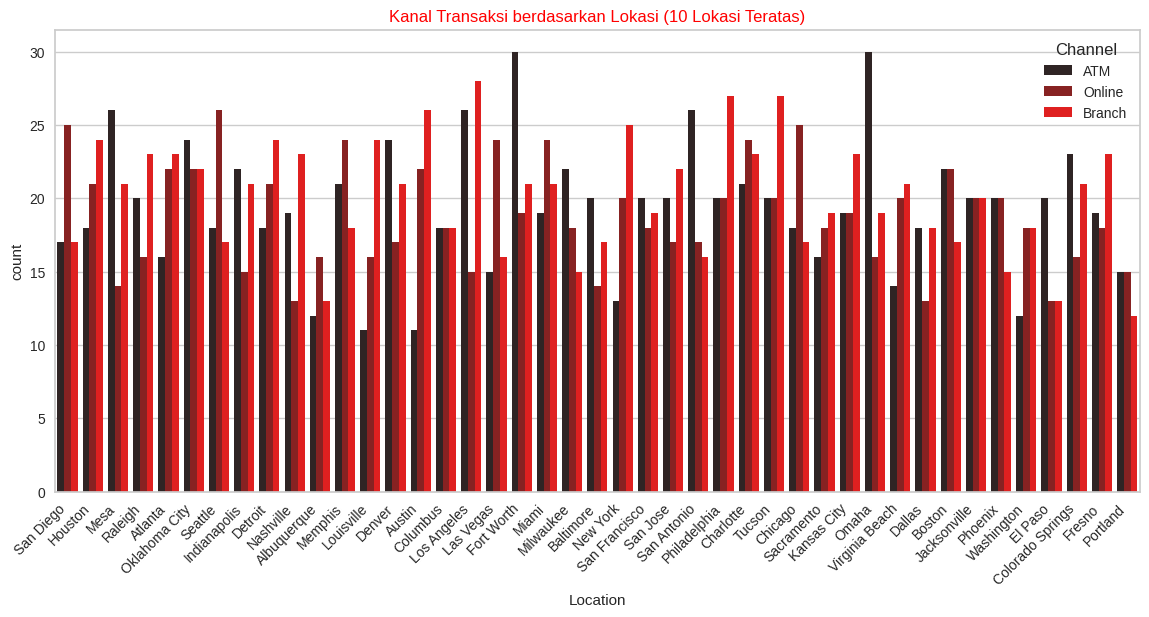

In [11]:
# Jenis Kanal Transaksi berdasarkan Lokasi (10 Lokasi Teratas)
plt.figure(figsize=(14, 6))
top_10_locations = df['Location'].value_counts().index[:10]
df_filtered = df[df['Location'].isin(top_10_locations)]
sns.countplot(x='Location', hue='Channel', data=df, color='red')
plt.xticks(rotation=45, ha="right")
plt.title('Kanal Transaksi berdasarkan Lokasi (10 Lokasi Teratas)', color="red")
plt.show()

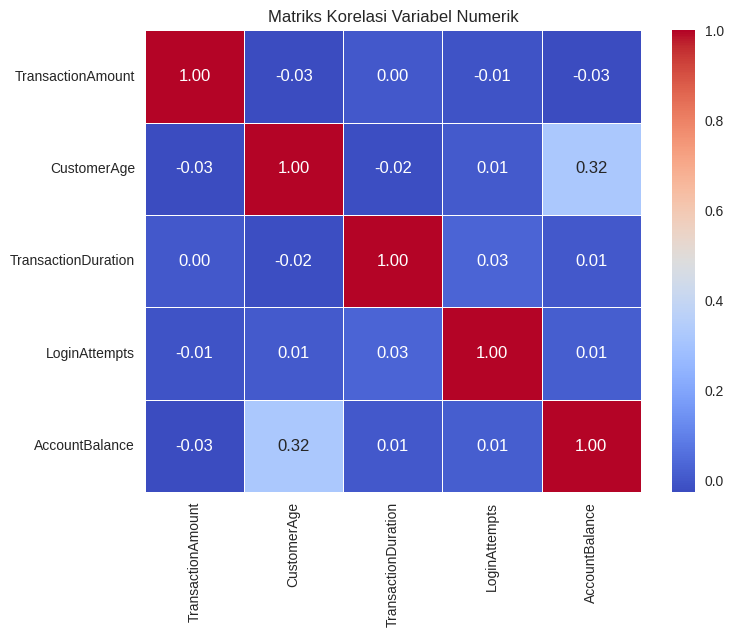

In [12]:
# Matriks korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Variabel Numerik")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [13]:
# Mengecek missing values
display(df.isnull().sum())

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [14]:
# Mengecek jumlah data duplikat
df.duplicated().sum()

np.int64(0)

In [15]:
# Normalisasi atau Standarisasi Fitur Numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [16]:
df[numerical_cols].head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,-0.971275,1.423718,-0.552443,-0.206794,-0.000537
1,0.269440,1.311287,0.305314,-0.206794,2.216472
2,-0.586882,-1.443277,-0.909842,-0.206794,-1.023534
3,-0.387456,-1.049768,-1.353017,-0.206794,0.885797
4,-0.973468,-1.049768,1.120184,-0.206794,0.593589


In [17]:
# Menampilkan hasil setelah normalisasi
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionHour
0,TX000001,AC00128,-0.971275,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.423718,Doctor,-0.552443,-0.206794,-0.000537,2024-11-04 08:08:08,16
1,TX000002,AC00455,0.269440,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.311287,Doctor,0.305314,-0.206794,2.216472,2024-11-04 08:09:35,16
2,TX000003,AC00019,-0.586882,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-1.443277,Student,-0.909842,-0.206794,-1.023534,2024-11-04 08:07:04,18
3,TX000004,AC00070,-0.387456,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-1.049768,Student,-1.353017,-0.206794,0.885797,2024-11-04 08:09:06,16
4,TX000005,AC00411,-0.973468,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,-1.049768,Student,1.120184,-0.206794,0.593589,2024-11-04 08:06:39,17


In [18]:
# Deteksi dan Penanganan Outlier (Menggunakan Z-Score)
z_scores = np.abs(stats.zscore(df[numerical_cols]))
df = df[(z_scores < 3).all(axis=1)]  # Menghapus outlier dengan threshold 3

In [19]:
# Menggunakan IQR untuk mendeteksi outlier
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menandai outlier
outliers = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).sum()
outliers

,0
TransactionAmount,89
CustomerAge,0
TransactionDuration,0
LoginAttempts,26
AccountBalance,0


In [20]:
# Menangani outlier dengan winsorization (capping)
df[numerical_cols] = df[numerical_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)

# Memeriksa ulang jumlah outlier setelah capping
outliers_after = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).sum()
outliers_after

,0
TransactionAmount,0
CustomerAge,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


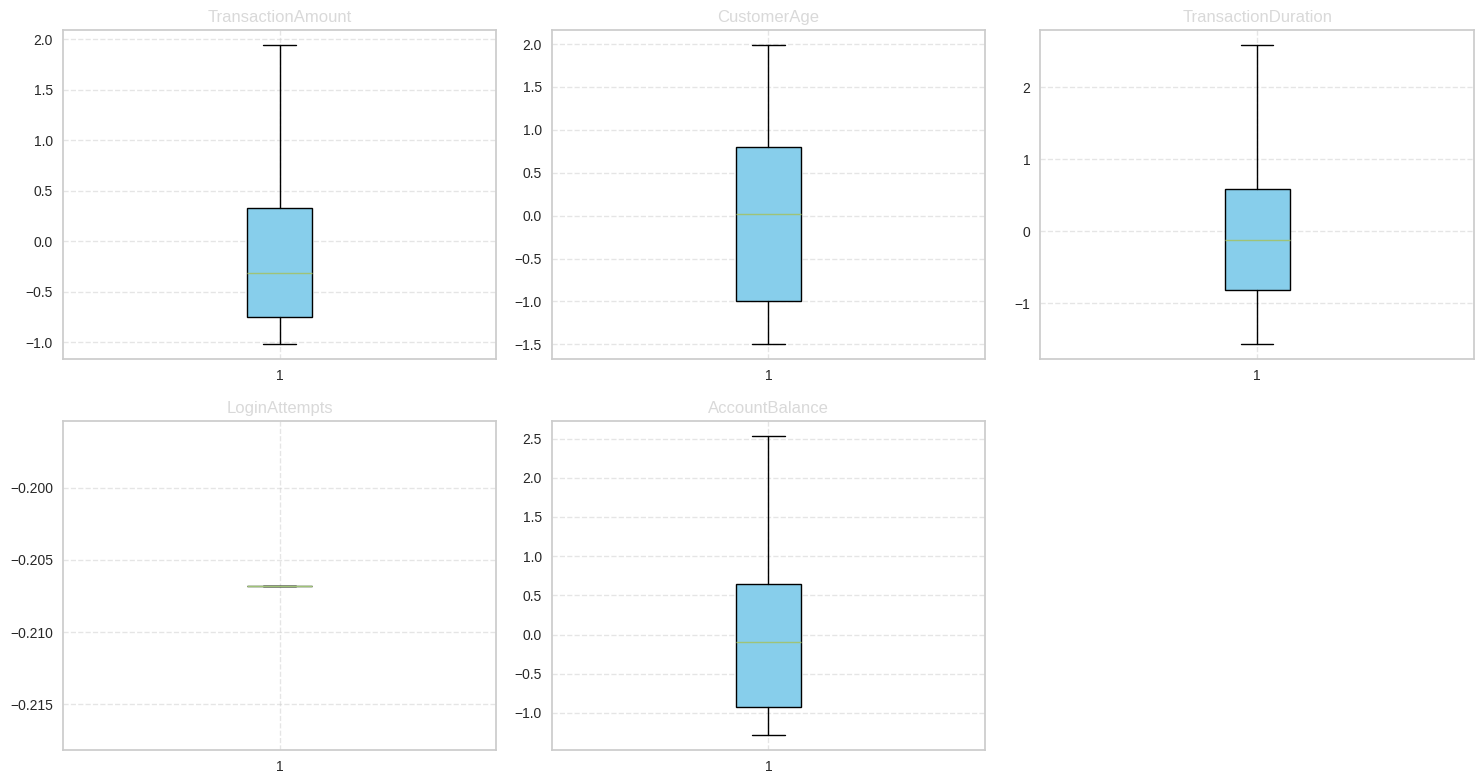

In [21]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[col], vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    plt.title(col, color='#D9D9D9')
    plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [22]:
# Menampilkan Nilai Unik di Kolom Kategorikal
categorical_columns = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
for col in categorical_columns:
    if col in df.columns:
        print(f"Unique values in {col}: {df[col].unique()}")
        print("\n")

Unique values in TransactionType: ['Debit' 'Credit']


Unique values in Location: ['San Diego' 'Houston' 'Mesa' 'Raleigh' 'Atlanta' 'Oklahoma City'
 'Seattle' 'Indianapolis' 'Detroit' 'Nashville' 'Albuquerque' 'Memphis'
 'Louisville' 'Denver' 'Austin' 'Columbus' 'Los Angeles' 'Las Vegas'
 'Milwaukee' 'Miami' 'Baltimore' 'San Francisco' 'San Jose' 'San Antonio'
 'Philadelphia' 'Charlotte' 'Tucson' 'Chicago' 'Sacramento' 'Kansas City'
 'Omaha' 'Virginia Beach' 'Dallas' 'Boston' 'Jacksonville' 'Phoenix'
 'Washington' 'Fort Worth' 'El Paso' 'Colorado Springs' 'New York'
 'Fresno' 'Portland']


Unique values in Channel: ['ATM' 'Online' 'Branch']


Unique values in CustomerOccupation: ['Doctor' 'Student' 'Retired' 'Engineer']




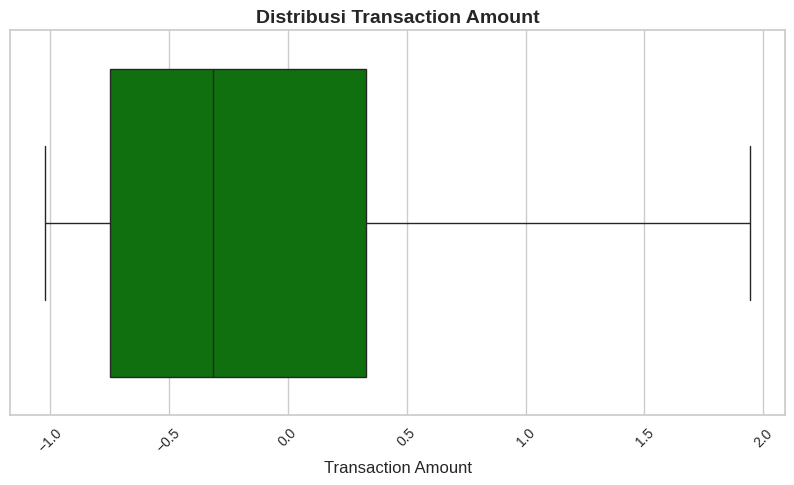

In [23]:
# Visualisasi distribusi TransactionAmount dengan boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['TransactionAmount'], color='green')

# Format angka pada sumbu x agar tidak dalam notasi ilmiah
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Transaction Amount", fontsize=12)
plt.title("Distribusi Transaction Amount", fontsize=14, fontweight='bold')
plt.show()

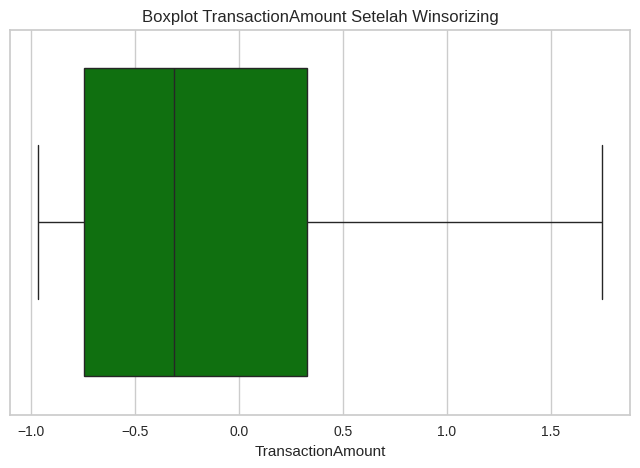

In [24]:
from scipy.stats.mstats import winsorize

# Winsorizing: Batasi nilai ekstrem (5% di bawah & atas)
df['TransactionAmount'] = winsorize(df['TransactionAmount'], limits=[0.05, 0.05])

# Visualisasi Distribusi TransactionAmount Setelah Winsorizing
plt.figure(figsize=(8, 5))
plt.xticks(rotation=0)
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df['TransactionAmount'], color="green")
plt.title("Boxplot TransactionAmount Setelah Winsorizing")
plt.show()

<ipython-input-25-0d5e462974ee>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Channel", y="TransactionAmount", data=df, palette="coolwarm")


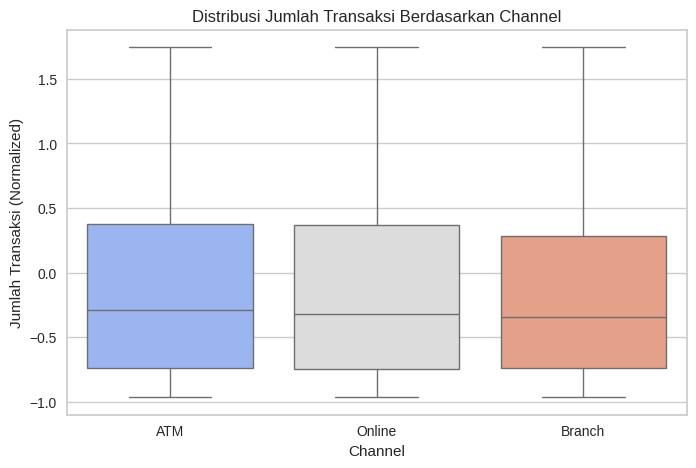

In [25]:
# Visualisasi distribusi transaksi berdasarkan Channel dengan boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x="Channel", y="TransactionAmount", data=df, palette="coolwarm")
plt.title("Distribusi Jumlah Transaksi Berdasarkan Channel")
plt.ylabel("Jumlah Transaksi (Normalized)")
plt.show()

In [26]:
# Encoding Data Kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Membuat salinan dataframe hasil preprocessing
df_encoded = df.copy()

In [27]:
df_encoded.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionHour
0,0,126,-0.964903,2023-04-11 16:29:14,1,36,364,186,14,0,1.423718,0,-0.552443,-0.206794,-0.000537,105,16
1,1,449,0.269440,2023-06-27 16:44:19,1,15,50,82,51,0,1.311287,0,0.305314,-0.206794,2.216472,192,16
2,2,18,-0.586882,2023-07-10 18:16:08,1,23,229,343,8,2,-1.443277,3,-0.909842,-0.206794,-1.023534,41,18
3,3,68,-0.387456,2023-05-05 16:32:11,1,33,182,300,1,2,-1.049768,3,-1.353017,-0.206794,0.885797,163,16
4,4,405,-0.964903,2023-10-16 17:51:24,0,1,297,500,90,2,-1.049768,3,1.120184,-0.206794,0.593589,16,17


In [28]:
# Menghapus Kolom ID Jika Ada
df_cleaned = df_encoded.drop(columns=['TransactionID', 'AccountID', 'MerchantID','IP Address', 'DeviceID'], errors='ignore')

In [29]:
df_cleaned.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionHour
0,-0.964903,2023-04-11 16:29:14,1,36,0,1.423718,0,-0.552443,-0.206794,-0.000537,105,16
1,0.269440,2023-06-27 16:44:19,1,15,0,1.311287,0,0.305314,-0.206794,2.216472,192,16
2,-0.586882,2023-07-10 18:16:08,1,23,2,-1.443277,3,-0.909842,-0.206794,-1.023534,41,18
3,-0.387456,2023-05-05 16:32:11,1,33,2,-1.049768,3,-1.353017,-0.206794,0.885797,163,16
4,-0.964903,2023-10-16 17:51:24,0,1,2,-1.049768,3,1.120184,-0.206794,0.593589,16,17


In [30]:
# Membuat kategori TransactionAmount dengan binning
bins = [df["TransactionAmount"].min(),
        df["TransactionAmount"].quantile(0.25),  # Q1
        df["TransactionAmount"].quantile(0.50),  # Median (Q2)
        df["TransactionAmount"].quantile(0.75),  # Q3
        df["TransactionAmount"].max() + 1]

labels = ["Rendah", "Sedang", "Tinggi", "Sangat Tinggi"]

# Proses binning menggunakan pd.cut()
df_cleaned['TransactionAmountKategori'] = pd.cut(
    df_cleaned['TransactionAmount'],
    bins=bins,
    labels=labels,
    right=False  # Interval [awal, akhir)
)

# Encoding kategori TransactionAmount
label_encoder_kategori = LabelEncoder()
df_cleaned['TransactionAmountKategori'] = label_encoder_kategori.fit_transform(df_cleaned['TransactionAmountKategori'])

# Menampilkan hasil akhir
print("\nData setelah binning TransactionAmount:")
print(df_cleaned)


Data setelah binning TransactionAmount:
      TransactionAmount     TransactionDate  TransactionType  Location  \
0             -0.964903 2023-04-11 16:29:14                1        36   
1              0.269440 2023-06-27 16:44:19                1        15   
2             -0.586882 2023-07-10 18:16:08                1        23   
3             -0.387456 2023-05-05 16:32:11                1        33   
4             -0.964903 2023-10-16 17:51:24                0         1   
...                 ...                 ...              ...       ...   
2507           1.745108 2023-04-26 17:09:36                0         7   
2508          -0.157779 2023-03-22 17:36:48                1        40   
2509          -0.921462 2023-08-21 17:08:50                1        36   
2510          -0.382420 2023-02-24 16:24:46                1        10   
2511          -0.186763 2023-02-14 16:21:23                0        17   

      Channel  CustomerAge  CustomerOccupation  TransactionDuration  \

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [31]:
df_cleaned[numerical_cols] = scaler.inverse_transform(df_cleaned[numerical_cols])

In [32]:
df_cleaned[numerical_cols]

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,15.95,70.0,81.0,1.0,5112.21
1,376.24,68.0,141.0,1.0,13758.91
2,126.29,19.0,56.0,1.0,1122.35
3,184.50,26.0,25.0,1.0,8569.06
4,15.95,26.0,198.0,1.0,7429.40
...,...,...,...,...,...
2507,806.97,33.0,109.0,1.0,12690.79
2508,251.54,48.0,177.0,1.0,254.75
2509,28.63,56.0,146.0,1.0,3382.91
2510,185.97,23.0,19.0,1.0,1776.91


In [33]:
# Feature Engineering
df_cleaned['AmountToBalanceRatio'] = df_cleaned['TransactionAmount'] / (df_cleaned['AccountBalance'] + 1e-9)
df_cleaned['AmountPerLogin'] = df_cleaned['TransactionAmount'] / (df_cleaned['LoginAttempts'] + 1e-9)
df_cleaned['TransactionHour'] = df_cleaned['TransactionDate'].dt.hour
df_cleaned['TimeOfDay'] = pd.cut(df_cleaned['TransactionHour'], bins=[0, 6, 12, 18, 24], labels=[0, 1, 2, 3], include_lowest=True, duplicates='drop').astype(int)

# Pilih Fitur yang Digunakan
features = ['TransactionAmount','TransactionDuration',
            'AccountBalance', 'LoginAttempts', 'AmountToBalanceRatio',
            'AmountPerLogin', 'TransactionHour', 'TimeOfDay']

X = df_cleaned[features]
X_scaled = scaler.fit_transform(X)

In [34]:
# Inisialisasi model KMeans dengan jumlah cluster optimal dari Elbow Method
kmeans_model = KMeans(n_clusters=4, random_state=0)
kmeans_model.fit(X)
labels = kmeans_model.labels_

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

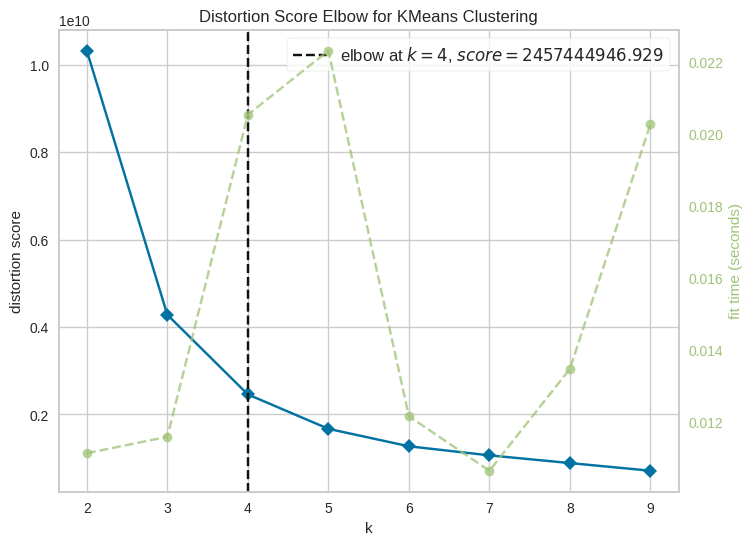

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
# Inisialisasi model K-Means
kmeans_elbow = KMeans(random_state=0)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 6))
visualizer = KElbowVisualizer(kmeans_elbow, k=(2, 10))
visualizer.fit(X)
optimal_k_elbow = visualizer.elbow_value_

# Menampilkan hasil visualisasi
visualizer.show()

Silhouette Score untuk k=2: 0.617
Silhouette Score untuk k=3: 0.620
Silhouette Score untuk k=4: 0.590
Silhouette Score untuk k=5: 0.563
Silhouette Score untuk k=6: 0.485
Silhouette Score untuk k=7: 0.464
Silhouette Score untuk k=8: 0.438
Silhouette Score untuk k=9: 0.440


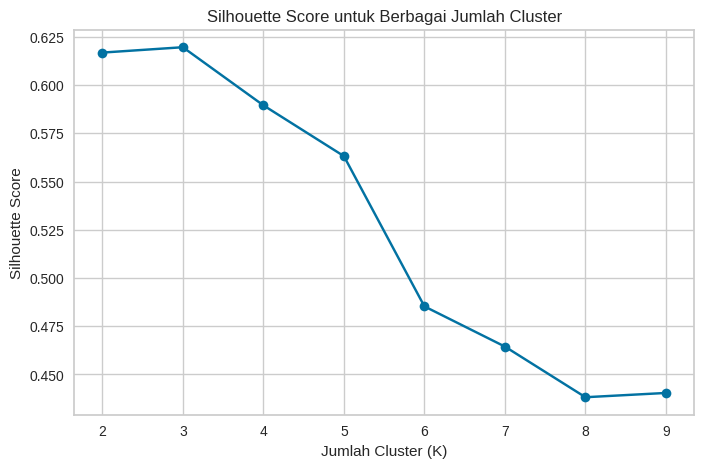

In [36]:
silhouette_scores = []
K_values = range(2, 10)  # Uji dari 2 hingga 10 cluster
max_silhouette_score = -1

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

    print(f"Silhouette Score untuk k={k}: {score:.3f}")

    if score > max_silhouette_score:
        max_silhouette_score = score

# Visualisasi Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Berbagai Jumlah Cluster')
plt.show()

optimal_k_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2

In [37]:
#print("\nRekomendasi Jumlah Cluster:")
print(f"- Berdasarkan Elbow Method: {optimal_k_elbow} cluster")
print(f"- Berdasarkan Silhouette Score: {optimal_k_silhouette} cluster")

- Berdasarkan Elbow Method: 4 cluster
- Berdasarkan Silhouette Score: 3 cluster


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [38]:
# Feature Selection dengan PCA
pca = PCA(n_components=0.95, random_state=42)  # Menyimpan 95% variansi
df_pca = pca.fit_transform(X)

# Membandingkan dengan performa model asli (tanpa PCA)
score_original = max_silhouette_score
print(f"Silhouette Score sebelum Feature Selection: {score_original:.3f}")

# Clustering setelah Feature Selection
kmeans_pca = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_pca_labels = kmeans_pca.fit_predict(df_pca)
sil_pca = silhouette_score(df_pca, kmeans_pca_labels)
print(f"Silhouette Score setelah Feature Selection (PCA): {sil_pca:.3f}")

Silhouette Score sebelum Feature Selection: 0.620
Silhouette Score setelah Feature Selection (PCA): 0.622


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

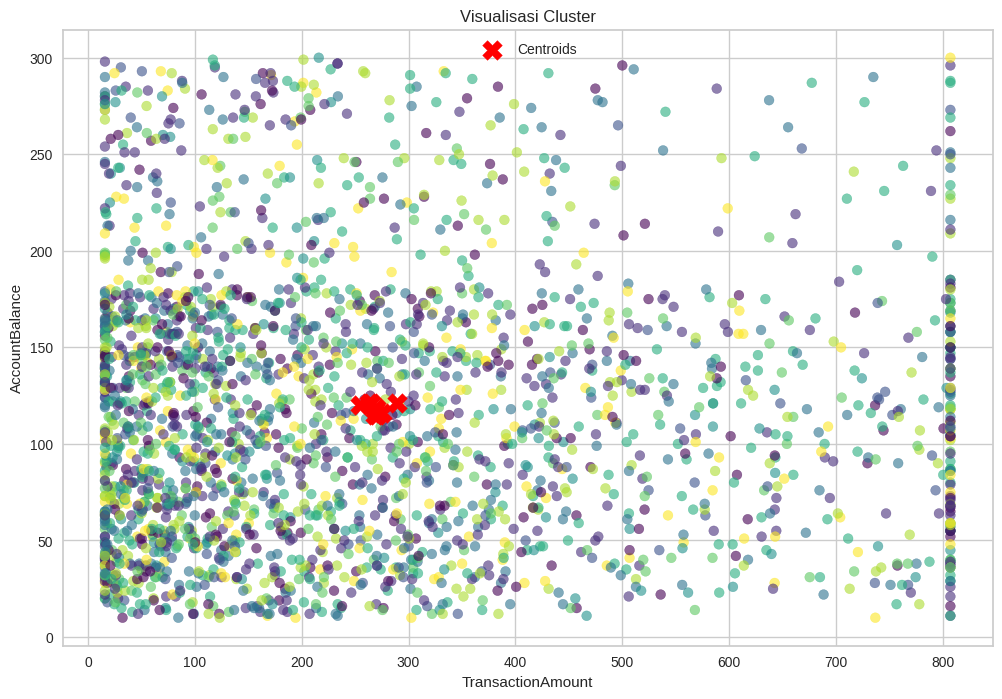

Jumlah centroid yang terbentuk: 9


In [39]:
# Visualisasi Hasil Clustering
plt.figure(figsize=(12, 8))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('Visualisasi Cluster')
plt.xlabel(features[0])
plt.ylabel(features[2])
plt.legend()
plt.show()

# Menampilkan jumlah centroid
print(f"Jumlah centroid yang terbentuk: {len(centroids)}")

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [40]:
# Menambahkan Hasil Label Cluster ke DataFrame
df_cleaned['Cluster'] = kmeans_model.labels_
df_original = df_cleaned.copy()

In [41]:
# Inverse transform untuk data numerik
df_original[features] = scaler.inverse_transform(X_scaled)

In [42]:
for col in categorical_cols:
    # Pastikan kolom yang di-inverse transform hanya yang asli, bukan kolom hasil clustering
    if col in label_encoders and col in df_original.columns:
        df_original[col] = label_encoders[col].inverse_transform(df_cleaned[col].astype(int))

df_original['TransactionAmountKategori'] = label_encoder_kategori.inverse_transform(df_cleaned['TransactionAmountKategori'])

In [43]:
print("Data asli setelah inverse transform:")
print(df_original.head())

Data asli setelah inverse transform:
   TransactionAmount     TransactionDate TransactionType   Location Channel  \
0              15.95 2023-04-11 16:29:14           Debit  San Diego     ATM   
1             376.24 2023-06-27 16:44:19           Debit    Houston     ATM   
2             126.29 2023-07-10 18:16:08           Debit       Mesa  Online   
3             184.50 2023-05-05 16:32:11           Debit    Raleigh  Online   
4              15.95 2023-10-16 17:51:24          Credit    Atlanta  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             Doctor                 81.0            1.0   
1         68.0             Doctor                141.0            1.0   
2         19.0            Student                 56.0            1.0   
3         26.0            Student                 25.0            1.0   
4         26.0            Student                198.0            1.0   

   AccountBalance PreviousTransactionDate  Transa

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [44]:
# Inverse transform untuk data numerik
df_original[features] = scaler.inverse_transform(X_scaled)

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [45]:
# Mengelompokkan data berdasarkan kolom 'cluster' dan menghitung statistik deskriptif
# untuk fitur 'tahun' dan 'pengeluaran'
cluster_stats = df_original.groupby('Cluster')[['AccountBalance', 'TransactionAmount']].agg(
    ['mean', 'median', 'std']  # Menghitung mean, median, dan standar deviasi
)

cluster_stats

AccountBalance                         TransactionAmount          \
                  mean     median          std              mean  median   
Cluster                                                                    
0          8325.173467   8122.895  1036.504112        261.908741  202.09   
1          1378.989525   1289.480   823.222739        276.756481  214.83   
2         12833.622532  12896.060  1258.650104        264.338354  168.54   
3          5273.024164   5398.720   973.091047        268.873261  211.27   

                     
                std  
Cluster              
0        220.704547  
1        232.543121  
2        242.313895  
3        227.184166

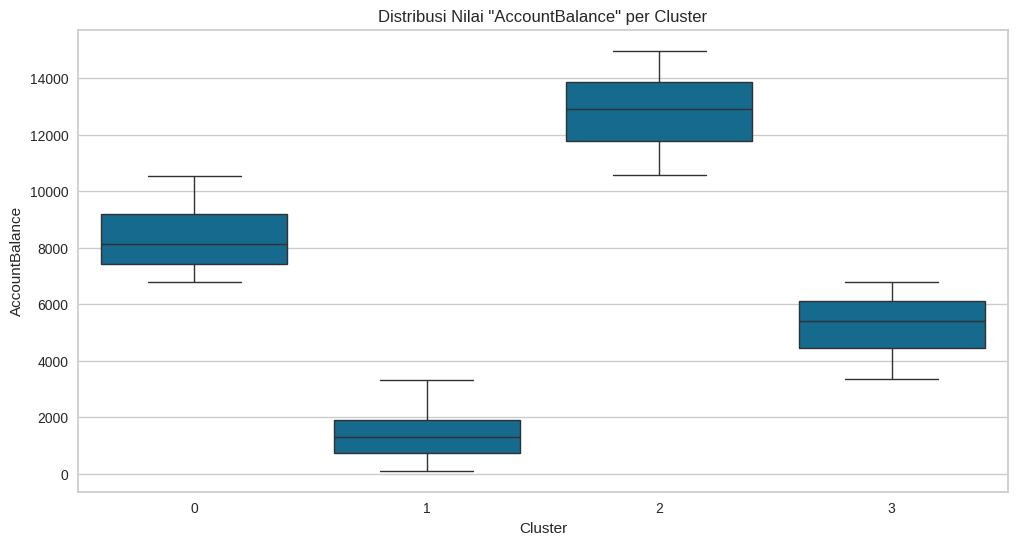

In [46]:
# Membuat boxplot untuk melihat distribusi nilai 'AccountBalance' di setiap cluster
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Cluster',
    y='AccountBalance',
    data=df_original
)
plt.title('Distribusi Nilai "AccountBalance" per Cluster')
plt.xlabel('Cluster')
plt.ylabel('AccountBalance')
plt.show()

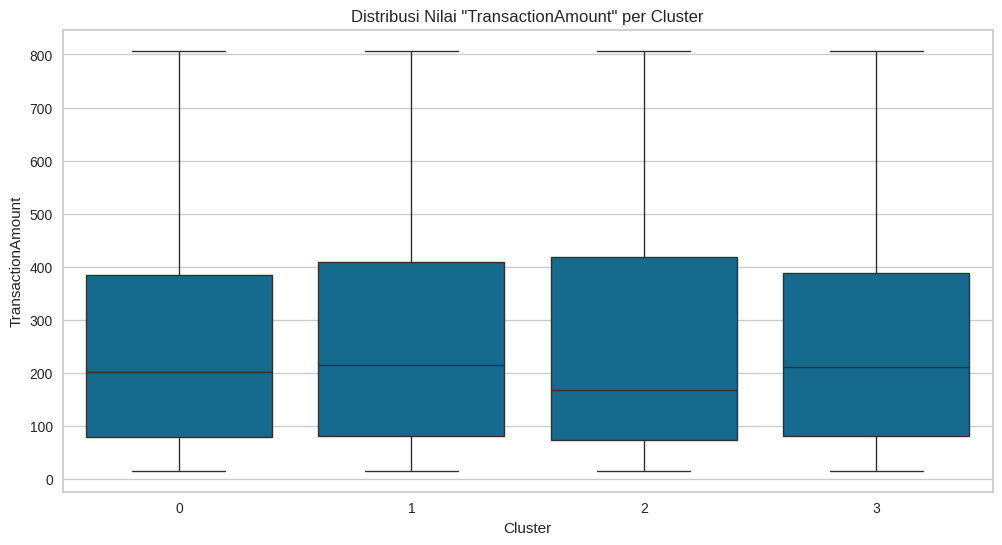

In [47]:
# Membuat boxplot untuk melihat distribusi nilai 'TransactionAmount' di setiap cluster
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Cluster',
    y='TransactionAmount',
    data=df_original
)
plt.title('Distribusi Nilai "TransactionAmount" per Cluster')
plt.xlabel('Cluster')
plt.ylabel('TransactionAmount')
plt.show()

# Interpretasi data
## Cluster 0:
- **Rata-rata Saldo Akun ($):** 8325 USD

- **Rata-rata Jumlah Transaksi ($):** 261 USD

**Analisis:**  
Cluster ini terdiri dari pengguna dengan saldo akun yang tinggi, namun dengan jumlah transaksi yang relatif kecil. Hal ini menunjukkan bahwa mereka kemungkinan adalah pengguna pasif, investor, atau nasabah prioritas yang cenderung menyimpan dana dalam jumlah besar namun tidak sering bertransaksi.

## Cluster 1:
- **Rata-rata Saldo Akun ($):** 1378 USD

- **Rata-rata Jumlah Transaksi ($):** 276 USD

**Analisis:**  
Cluster ini mencerminkan pengguna dengan saldo akun terendah, namun dengan jumlah transaksi tertinggi di antara semua cluster. Ini menunjukkan kemungkinan besar mereka adalah pengguna aktif dengan dana terbatas, seperti pelaku usaha kecil, pekerja aktif, atau individu dengan frekuensi pengeluaran tinggi untuk kebutuhan rutin.

## Cluster 2:
- **Rata-rata Saldo Akun ($):** 12833 USD

- **Rata-rata Jumlah Transaksi ($):** 264 USD

**Analisis:**  
Pengguna pada cluster ini memiliki saldo akun tertinggi secara signifikan. Walaupun jumlah transaksi tidak yang paling besar, mereka tetap menunjukkan aktivitas transaksi yang stabil. Ini bisa jadi adalah kelompok nasabah premium atau profesional mapan yang menyimpan dana besar dan melakukan transaksi rutin dalam nominal menengah.

## Cluster 3:
- **Rata-rata Saldo Akun ($):** 5273 USD

- **Rata-rata Jumlah Transaksi ($):** 268 USD

**Analisis:**  
Cluster ini merepresentasikan pengguna dengan saldo menengah dan jumlah transaksi yang cukup aktif. Mereka mungkin adalah pengguna reguler seperti keluarga muda atau pekerja profesional yang melakukan transaksi rutin namun dengan saldo yang tidak terlalu besar.



# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [48]:
df_original.to_csv('dataset_klasifikasi.csv', index=False)
print("Data telah diekspor ke 'dataset_klasifikasi.csv'")

Data telah diekspor ke 'dataset_klasifikasi.csv'
